**UE 4268 - Examen 2023**

**`AHMAT MAHAMAT HAMID`**, `13p2956` et `mahamat.ahmat1@facsciences-uy1.cm` 

Department of Physics - Faculty of Science - University of Yaoundé I

`physique atomique moleculaire et biophysique`

`19\06\2023`

In [27]:
from IPython.display import Image

# Algorithme de la VQE

**Cet exercice se traite exclusivement sur la feuille de composition**

L'algorithme du VQE (Variationnal Quantum Eigensolver) se résume en deux grandes parties qu'illustre la figure ci-dessous.
 
1. Expliquer pourquoi on dit que c'est un **algorithme hybride** en indiquant ce que fait chaque processeur. 
2. Qu'est-ce que la profondeur d'un circuit quantique et quelle son influence dans les algorithmes du VQE?

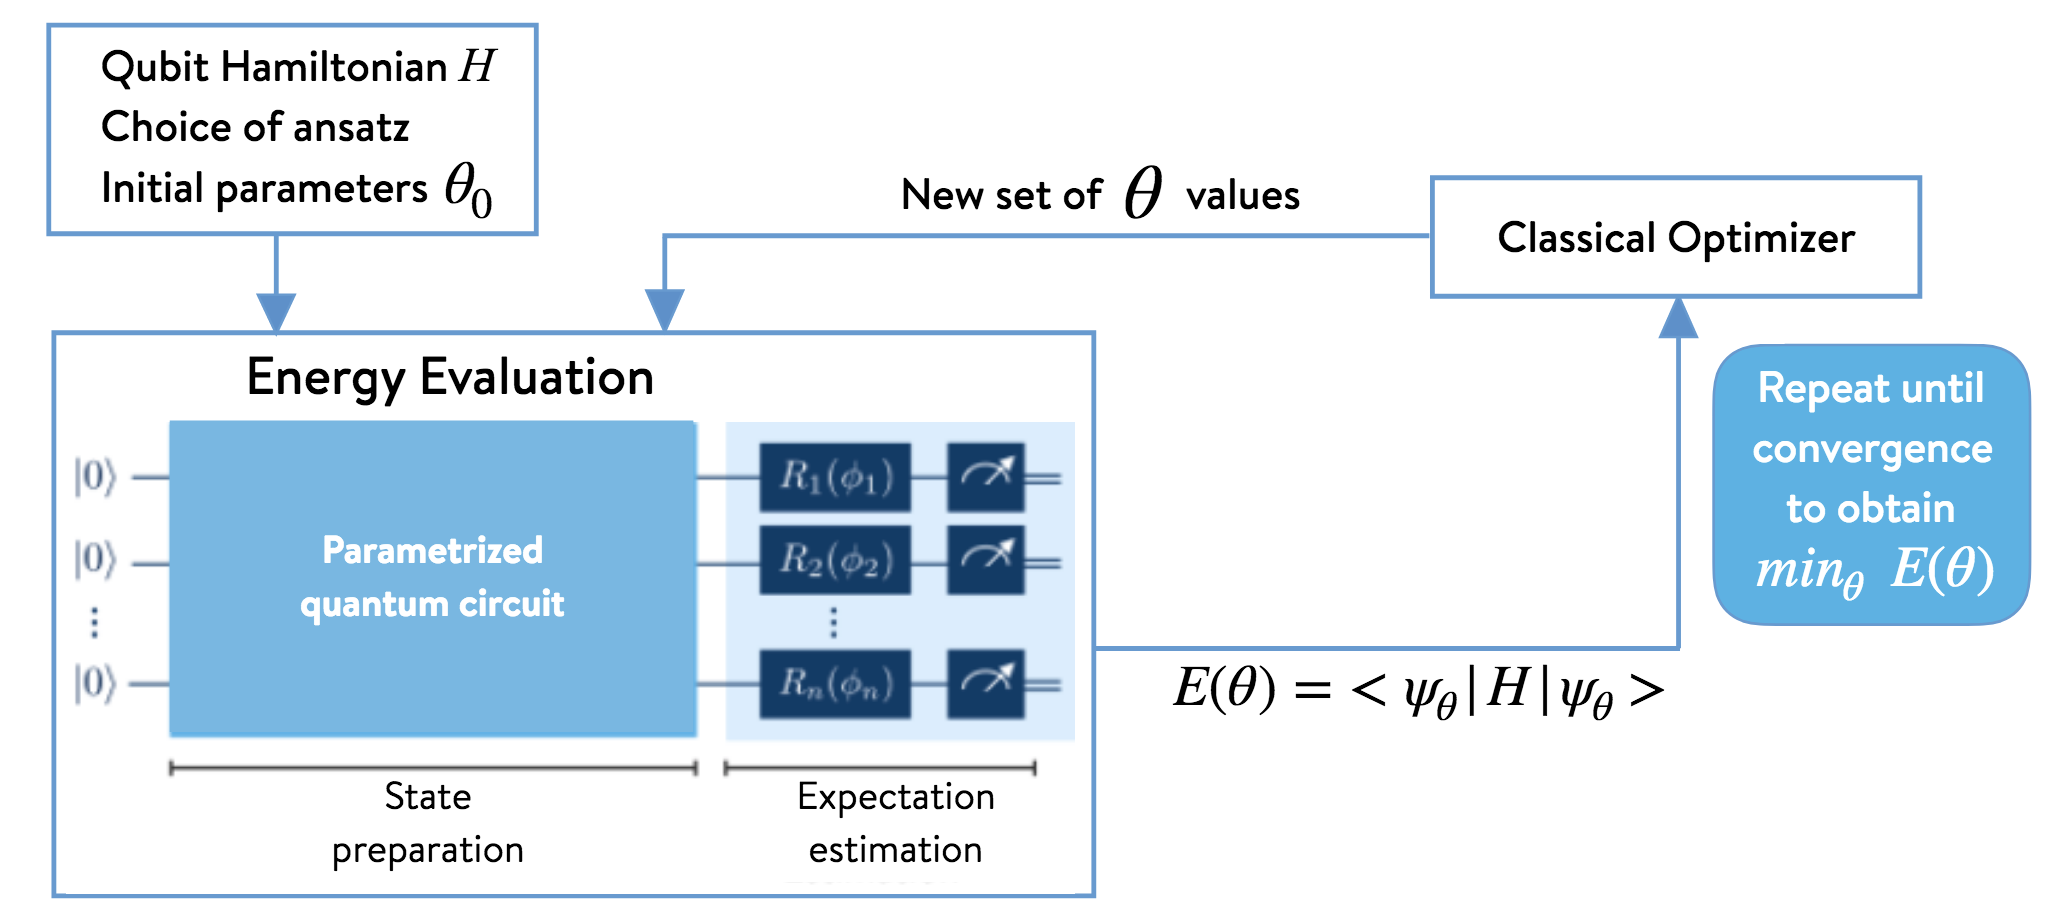

In [28]:
Image("./VQE_Diagram.png", width=600)

# Support Vector Regression to predict polarity of molecules

Write a python script that use a **support vector regression (SVR)** model to predict **TPSA** (**Topological polar surface area**, a physicochemical property describing the polarity of molecules) from molecules of the ZING Dataset contained in the file `'.Zn10.txt'`. The input - structural feature of molecules is Morgan fingerprint and the output is TPSA.

We recall that the **molecular fingerprint** represents the substructures of a molecule (array) as a vector of binary numbers. It is a molecular structure descriptor to use as input to reveal the relationship between molecular structure and properties, called **Quantitative Structure-Activity Relationships (QSAR)**.

The workflow is

1. Get molecular fingerprints of each molecule
2. Split the dataset to training set and test set
3. Train a SVR model
4. Check the accuracy of prediction with $R²$ and mean-square error
5. Visualize the results from the model.

**The various necessaries libraries and modules will be import only where they are needed**.


In [29]:
import sklearn
print(sklearn.__version__)

1.0.2


In [30]:
import rdkit
print(rdkit.__version__)

2022.09.5


* 1. Get molecular fingerprints of each molecule

In [31]:
# Import libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import os
################################################################################
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem, PandasTools, Descriptors

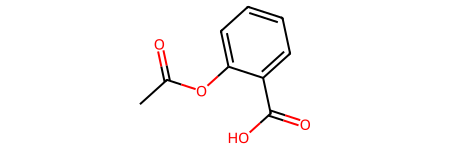

In [32]:
smi = 'O=C(C)Oc1ccccc1C(=O)O'
m = Chem.MolFromSmiles(smi) # Convert smiles to molecule
m

In [33]:
print(f'The number of heavy atoms (non-hydrogen atoms) in the molecule is {m.GetNumHeavyAtoms()}')

The number of heavy atoms (non-hydrogen atoms) in the molecule is 13


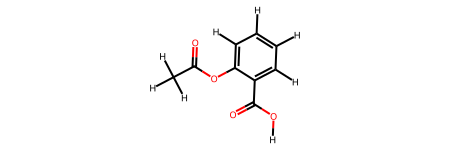

In [34]:
m1 = AllChem.AddHs(m)
m1

In [35]:
adj = Chem.rdmolops.GetAdjacencyMatrix(m)
adj ## Adjacency matrix : a(i,j) == 1 if atom pair (i,j) is connected and 0 lse.

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]], dtype=int32)

In [36]:
for atom in m.GetAtoms():
    print (atom.GetIdx(), "th atom is ", atom.GetSymbol(), ", total number of hydrogens is", atom.GetTotalNumHs(), 
           ", and aromaticity indicator is", atom.GetIsAromatic())

0 th atom is  O , total number of hydrogens is 0 , and aromaticity indicator is False
1 th atom is  C , total number of hydrogens is 0 , and aromaticity indicator is False
2 th atom is  C , total number of hydrogens is 3 , and aromaticity indicator is False
3 th atom is  O , total number of hydrogens is 0 , and aromaticity indicator is False
4 th atom is  C , total number of hydrogens is 0 , and aromaticity indicator is True
5 th atom is  C , total number of hydrogens is 1 , and aromaticity indicator is True
6 th atom is  C , total number of hydrogens is 1 , and aromaticity indicator is True
7 th atom is  C , total number of hydrogens is 1 , and aromaticity indicator is True
8 th atom is  C , total number of hydrogens is 1 , and aromaticity indicator is True
9 th atom is  C , total number of hydrogens is 0 , and aromaticity indicator is True
10 th atom is  C , total number of hydrogens is 0 , and aromaticity indicator is False
11 th atom is  O , total number of hydrogens is 0 , and aro

In [37]:
molwt = Descriptors.ExactMolWt(m)
logP = Descriptors.MolLogP(m)
tpsa = Descriptors.TPSA(m)
Qed = Chem.QED.qed(m)

print(f'Our molecular properties are:\n Molecular weight:{molwt}, \t polarity:{tpsa}, \t solubility:{logP}, \t Quantitative drug-likeness:{Qed}')

Our molecular properties are:
 Molecular weight:180.042258736, 	 polarity:63.60000000000001, 	 solubility:1.3101, 	 Quantitative drug-likeness:0.5501217966938848


In [38]:
fps = []
fp = AllChem.GetMorganFingerprintAsBitVect(m, 2, nBits=1024) 
# the number 2 denotes the number of iterations in Morgan algorithm.

fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
fps.append(fp)

fps = np.asarray(fps) # Convert our encoded molecule to an array
fps.shape

(1, 1024)

 2. Split the dataset to training set and test set

In [44]:
PATH = os.getcwd()
data_path = os.path.join(PATH, './Dataset/smilesZn100.txt')

In [45]:
with open(data_path, 'r') as f:
    content = f.readlines()
    smile = [smi.split() for smi in content]
    
smile


[['NC(=O)C1CCCCC1C(F)(F)F'],
 ['CCCCCNC(=O)N1CCCC1CO'],
 ['CCC(CC)c1cc(C[NH3+])on1'],
 ['C[NH2+]C1CCC(c2ccccc2Cl)C1'],
 ['COc1ccc2c(c1)C(C(C)[NH3+])CN2C'],
 ['CC1C[NH2+]CCN1CCCc1ccco1'],
 ['Cc1ccc(S(=O)(=O)C2CC[NH2+]C2)cc1C'],
 ['COc1cc(C(N)C(F)(F)F)ccc1C(=O)[O-]'],
 ['Nc1cc(C2CCC[NH2+]2)ccc1O'],
 ['CN(C)S(=O)(=O)N1CC2CC1C(=O)O2'],
 ['CC(O)CC[NH2+]C(C)(C)C'],
 ['C=CC(C)OC(C)CC(=O)[O-]'],
 ['N#Cc1ccc2cc(C#N)ccc2c1'],
 ['Cc1ccc(O)c(C2(C)CCCO2)c1'],
 ['Cc1ccc(C)c2c1CC[NH2+]C2CC(O)C(=O)[O-]'],
 ['c1cc(C2NCCc3ccc4c(c32)OCO4)co1'],
 ['[NH3+]CCCn1c(CCO)nc2cccnc21'],
 ['CC([NH3+])C1CCCc2c1nc(C(F)(F)F)n2C'],
 ['CC(C)n1c(C2CCC[NH2+]C2)[nH+]c2c1CCCC2'],
 ['Cc1cc([O-])c2nnc(CC([NH3+])C(=O)[O-])n2n1'],
 ['C[NH+](C)CC(CC[NH3+])c1ccc(Cl)cc1'],
 ['CCc1ccc(-c2cnnc([O-])c2C#N)cc1'],
 ['Cc1cc(C(N)=[NH2+])c(C2CC2)o1'],
 ['CCCCN(C)c1nccc(C(=O)[O-])n1'],
 ['CC(C)(C[NH3+])C(=O)Nc1cccc(Cl)c1'],
 ['CC(=CC(=O)NCC1CC1)c1ccccc1'],
 ['CCNC(=O)N(CC)C(C)c1ccc(C#N)cc1'],
 ['CNC(=O)c1cc(O)c2ccc(OC)cc2c1'],
 ['CCC(CO)N

In [46]:
df = pd.DataFrame(data=smile, columns=['Smiles'])
df.isnull().sum()

Smiles    1
dtype: int64

In [47]:
df1=df.iloc[0:1000, :]

/home/ahmat/mambaforge/envs/ahmat_labs/lib/python3.7/site-packages/rdkit/Chem/PandasTools.py:379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame[molCol] = frame[smilesCol].map(Chem.MolFromSmiles)


,Smiles,Molecules
0,NC(=O)C1CCCCC1C(F)(F)F,
1,CCCCCNC(=O)N1CCCC1CO,
2,CCC(CC)c1cc(C[NH3+])on1,
3,C[NH2+]C1CCC(c2ccccc2Cl)C1,
4,COc1ccc2c(c1)C(C(C)[NH3+])CN2C,
...,...,...
995,CC1(C)CCCCC1(O)CO,
996,COC(=O)c1ccccc1-c1cc(Cl)ncn1,
997,O=S(=O)([O-])CCCN1CC[NH2+]CC1,
998,CC[NH+](CC)CC(O)c1ccc2ccccc2c1,

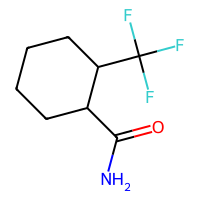
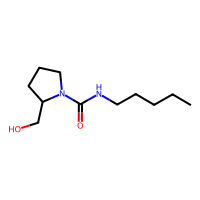
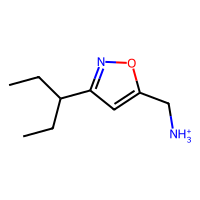
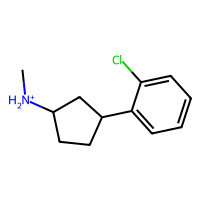
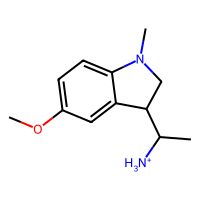
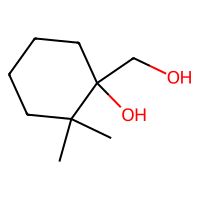
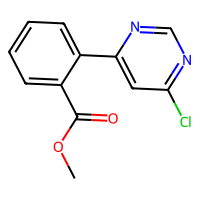
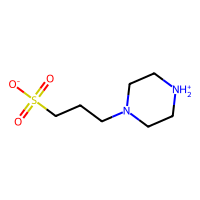
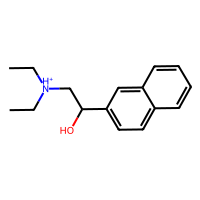
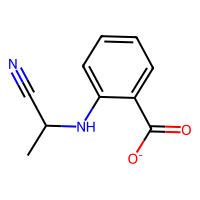

In [48]:
PandasTools.AddMoleculeColumnToFrame(frame=df1, smilesCol='Smiles', molCol='Molecules')
df1

In [49]:
df1.isnull().sum()

Smiles       0
Molecules    0
dtype: int64

In [50]:
def calculate_descriptors(mol):
    mw = Descriptors.MolWt(mol)
    logp = Descriptors.MolLogP(mol)
    hbd = Descriptors.NumHDonors(mol)
    hba = Descriptors.NumHAcceptors(mol)
    psa = Descriptors.TPSA(mol)
    rb = Descriptors.NumRotatableBonds(mol)
    rg = Descriptors.NumAromaticRings(mol)
    qed = Chem.QED.qed(mol)
    return [mw, logp, hbd, hba, psa, rg, rb, qed]

In [51]:
molecule = df1.iloc[:, 1].values
descriptors = [calculate_descriptors(mol) for mol in molecule]

In [52]:
descriptors_df1 = pd.DataFrame(descriptors, columns=['MW', 'LogP', 'HBD', 'HBA', 'PSA', 'Aromatic Rings', 'Rotatable Bonds', 'QED'])
data = pd.concat([df1, descriptors_df1], axis=1)
data


,Smiles,Molecules,MW,LogP,HBD,HBA,PSA,Aromatic Rings,Rotatable Bonds,QED
0,NC(=O)C1CCCCC1C(F)(F)F,<rdkit.Chem.rdchem.Mol object at 0x7fd3f232d1b0>,195.184,1.84040,1,1,43.09,0,1,0.681153
1,CCCCCNC(=O)N1CCCC1CO,<rdkit.Chem.rdchem.Mol object at 0x7fd3f232d210>,214.309,1.34290,2,2,52.57,0,5,0.678579
2,CCC(CC)c1cc(C[NH3+])on1,<rdkit.Chem.rdchem.Mol object at 0x7fd3f232d270>,169.248,1.32010,1,2,53.67,1,4,0.738657
3,C[NH2+]C1CCC(c2ccccc2Cl)C1,<rdkit.Chem.rdchem.Mol object at 0x7fd3f232d2d0>,210.728,2.16930,1,0,16.61,1,2,0.770859
4,COc1ccc2c(c1)C(C(C)[NH3+])CN2C,<rdkit.Chem.rdchem.Mol object at 0x7fd3f232d330>,207.297,0.85900,1,2,40.11,1,2,0.781030
...,...,...,...,...,...,...,...,...,...,...
995,CC1(C)CCCCC1(O)CO,<rdkit.Chem.rdchem.Mol object at 0x7fd3f22c4c90>,158.241,1.31000,2,2,40.46,0,1,0.603756
996,COC(=O)c1ccccc1-c1cc(Cl)ncn1,<rdkit.Chem.rdchem.Mol object at 0x7fd3f22c4cf0>,248.669,2.58360,0,4,52.08,2,2,0.605510
997,O=S(=O)([O-])CCCN1CC[NH2+]CC1,<rdkit.Chem.rdchem.Mol object at 0x7fd3f22c4d50>,208.283,-2.19930,1,4,77.05,0,4,0.531939
998,CC[NH+](CC)CC(O)c1ccc2ccccc2c1,<rdkit.Chem.rdchem.Mol object at 0x7fd3f22c4db0>,244.358,1.79790,2,1,24.67,2,5,0.823399


In [53]:
data.isnull().sum()

Smiles             0
Molecules          0
MW                 0
LogP               0
HBD                0
HBA                0
PSA                0
Aromatic Rings     0
Rotatable Bonds    0
QED                0
dtype: int64

In [54]:
fps = []
for mol in molecule:
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024)
    fp_arr = np.zeros((1,))
    DataStructs.ConvertToNumpyArray(fp, fp_arr)
    fps.append(fp)

In [55]:
# Convert the fingerprint as an array 
fps = np.asarray(fps)
fps

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [56]:
fps.shape

(1000, 1024)

2. Split the dataset to training set and test set

In [57]:
logp = data.iloc[:,3].values

In [58]:
logp.shape[0] == fps.shape[0]

True

In [59]:
from sklearn.model_selection import train_test_split

seed = np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(fps, logp, train_size=0.8, random_state=seed)

3.Train a SVR model

In [60]:
from sklearn.svm import SVR

svr = SVR()
_ = svr.fit(X_train, y_train)

4. Check the accuracy of prediction with $R²$ and mean-square error

In [61]:
from sklearn.metrics import mean_squared_error, r2_score

logp_predict = svr.predict(X_test)
r2 = r2_score(y_test, logp_predict)
mse = mean_squared_error(y_test, logp_predict)

print('The r2_score is {} '.format(r2),'and the mean square error is {}'.format(mse))

The r2_score is 0.695931119734304  and the mean square error is 0.5266155249269788


5. Visualize the results from the model.

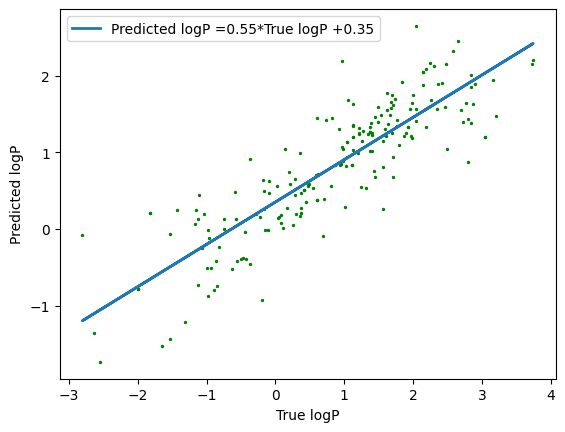

In [62]:
from scipy import stats

vect_norm, intercept, r_value, p_value, std_error = stats.linregress(y_test, logp_predict)
fx = vect_norm * y_test + intercept

plt.scatter(y_test, logp_predict, color='green', s=2)
plt.plot(y_test, fx, label='Predicted logP ='+str(round(vect_norm,2))+'*True logP +'+str(round(intercept,2)), linewidth=2)
plt.xlabel('True logP')
plt.ylabel('Predicted logP')
plt.legend()
plt.show()

# Calculer l'état fondamental de la molécule de phenylsulfonyl-carbazole (PSPCz)

Les calculateurs quantiques pourraient être des outils inestimables pour étudier la structure électronique et les propriétés dynamiques de molécules et de matériaux complexes, car il est plus logique de modéliser des systèmes de la physique quantique sur un dispositif quantique que sur un calculateur classique. Le phenylsulfonyl-carbazole (PSPCz) dont la formule moléculaire est $C_{18}H_{13}NO_2S$ et son SMILES isomérique est C1=CC=C(C=C1)S(=O)(=O)C2=CC=CC3=C2NC4=CC=CC=C34, a des propriétés émettrices utiles de fluorescence retardée activée thermiquement (TADF) pour les applications de diodes électroluminescentes organiques (OLED). Son Hamiltonien en représentation de Pauli $\{\mathtt{I,\,X,\,Y,\,Z}\}$ est

$$ \mathtt{H} = h_1(\mathtt{I}\otimes\mathtt{I}) + h_2(\mathtt{Z}\otimes\mathtt{I} - \mathtt{I}\otimes\mathtt{Z}) + h_3(\mathtt{Z}\otimes\mathtt{Z}) + h_4(\mathtt{x}\otimes\mathtt{X}) + h_5(\mathtt{X}\otimes\mathtt{I} + \mathtt{I}\otimes\mathtt{X} + \mathtt{X}\otimes\mathtt{Z} - \mathtt{Z}\otimes\mathtt{X}),$$

où les coefficients 
$$h_1 = -0.518418,\, h_2 = -0.136555,\, h_3 = -0.025866,\, h_4 = 0.015725,\, h_5 = -0.000296.$$

1. Utiliser `rdkit.Chem` pour représenter en 2D de molécule PSPCz à partir de son SMILES.

In [6]:
# Put your code here

2. Utiliser, pour calculer l'état fondamental de la molécule PSPCz,
   * `qiskit.opflow.operator_globals` et 
   * `qiskit.algorithms.minimum_eigensolvers.NumPyMinimumEigensolver`.

In [7]:
# Put your code here

# VQE avec un Hardware Efficient Ansatz (HEA)

1. Utiliser  `qiskit.circuit.library.EfficientSU2` pour reproduire le Hardware Efficient Ansatz (HEA) suivant : 

In [63]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.tools.visualization import circuit_drawer, array_to_latex
from qiskit.quantum_info import state_fidelity
from qiskit import Aer, transpile

2. Utiliser ce HEA (que l'on nommera `SU2ansatz`) dans l'algorithme VQE, définit ci-dessous par la fonction `algorithm(problem, mapper, optimizer)`, pour calculer l'état fondamental de la molécule $H_2$.

In [ ]:
from qiskit.primitives import Estimator
from qiskit.algorithms.minimum_eigensolvers import VQE
from qiskit_nature.second_q.algorithms import GroundStateEigensolver

import numpy as np

def algorithm(problem, mapper, optimizer):
    """ Setup VQE solver algorithm

    Args:
        problem : Electronic Structure Problem
        mapper : qubit mapper 
        optimizer : optimizer

    Returns: vqe solver algorithm
    """    
    
    #ansatz
    ansatz = SU2ansatz # previously constructed
    
    #VQE algorithm solver
    vqe_solver = VQE(Estimator(), ansatz, optimizer)
    vqe_solver.initial_point = np.zeros(ansatz.num_parameters)
 
    # Ground state computation using a minimum eigensolver
    algorithm = GroundStateEigensolver(mapper, vqe_solver)
       
    # Compute Ground State properties.
    algorithm = algorithm.solve(problem)
    
    return algorithm

In [ ]:
from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.second_q.transformers import FreezeCoreTransformer

H2_driver = PySCFDriver(
    atom='H .0 .0 -0.3625; H .0 .0 0.3625',
    basis="sto3g",
    charge=0,
    spin=0,
    unit=DistanceUnit.ANGSTROM,
)
# Electronic structure problem
H2_problem = H2_driver.run()
transformer = FreezeCoreTransformer()
H2_problem = transformer.transform(H2_problem)

In [ ]:
from qiskit_nature.second_q.mappers import JordanWignerMapper
from qiskit_nature.second_q.mappers import TaperedQubitMapper
from qiskit.algorithms.optimizers import SLSQP

# Put your code here